In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICE'] = ''
import random

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.iam_paragraphs import IAMParagraphs
from text_recognizer.data.iam_synthetic_paragraphs import IAMSyntheticParagraphs
import text_recognizer.util as util

In [2]:
def _plot(image, figsize=(12,12), title='', vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)

def convert_y_label_to_string(y, mapping, padding_index=3):
    return ''.join([mapping[i] for i in y if i != padding_index])

In [3]:
dataset = IAMParagraphs()
dataset.prepare_data()
dataset.setup()
print(dataset)

IAMParagraphs.prepare_data: Cropping IAM paragraph regions and saving them along with labels...
IAMParagraphs.setup(None): Loading IAM paragraph regions and lines...


c:\users\liyz0\.conda\envs\fsdl-text-recognizer-2021\lib\site-packages\torchvision\transforms\transforms.py:1315: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


IAM Paragraphs Dataset
Num classes: 84
Input dims : (1, 576, 640)
Output dims: (682, 1)
Train/val/test sizes: 1046, 262, 231
Train Batch x stats: (torch.Size([128, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0399), tensor(0.1118), tensor(1.))
Train Batch y stats: (torch.Size([128, 682]), torch.int64, tensor(1), tensor(83))
Test Batch x stats: (torch.Size([128, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0284), tensor(0.0846), tensor(0.9373))
Test Batch y stats: (torch.Size([128, 682]), torch.int64, tensor(1), tensor(83))



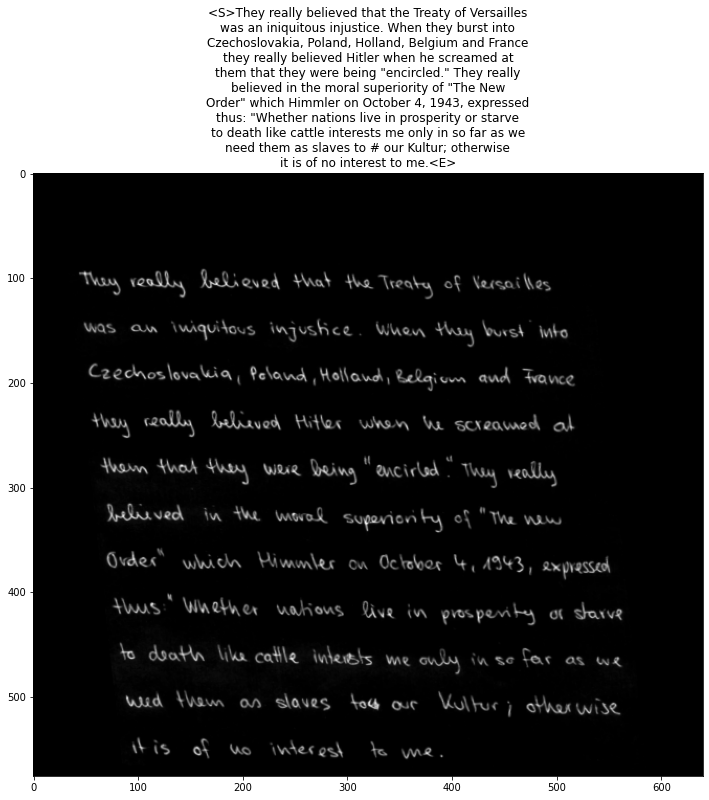

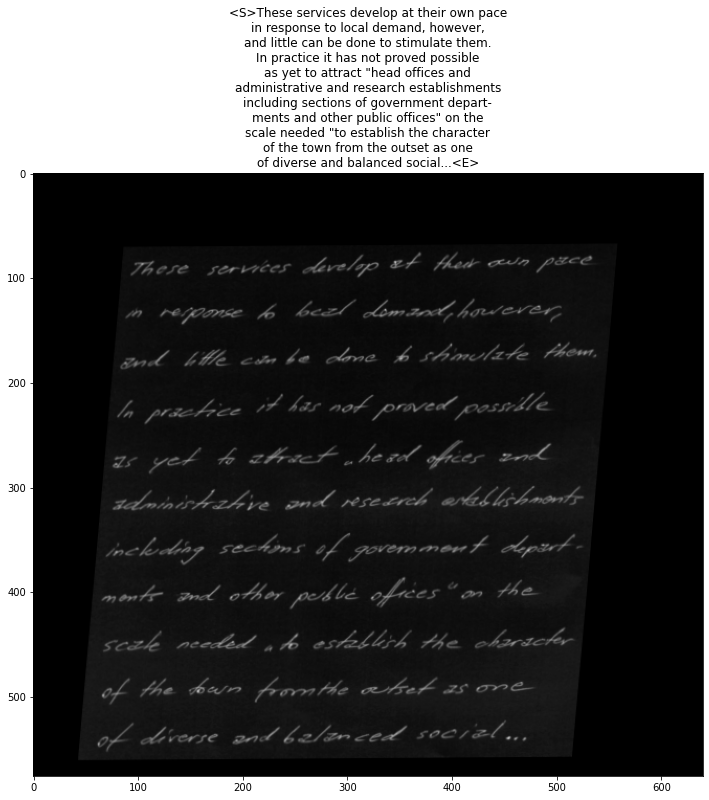

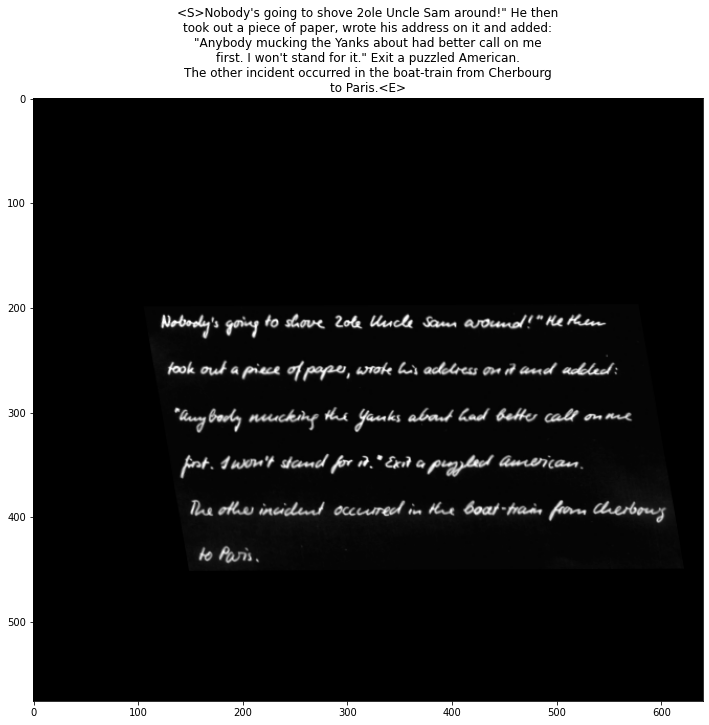

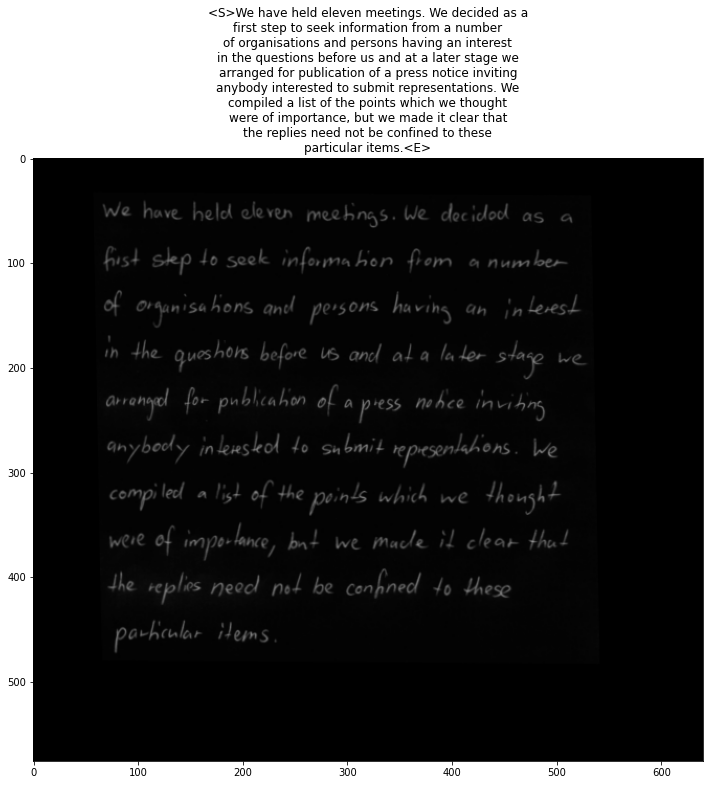

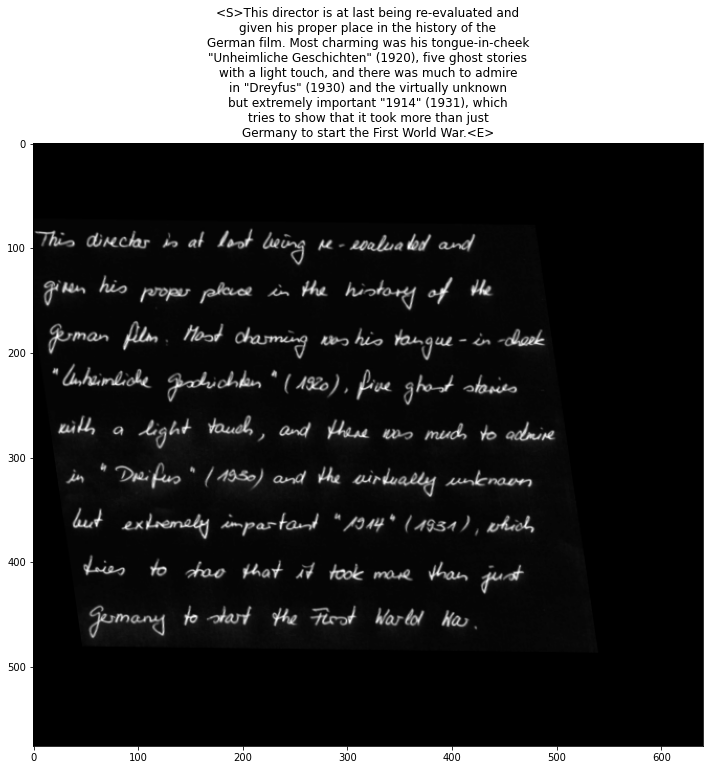

In [4]:
# Training

for _ in range(5):
    i = random.randint(0, len(dataset.data_train))
    x, y = dataset.data_train[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

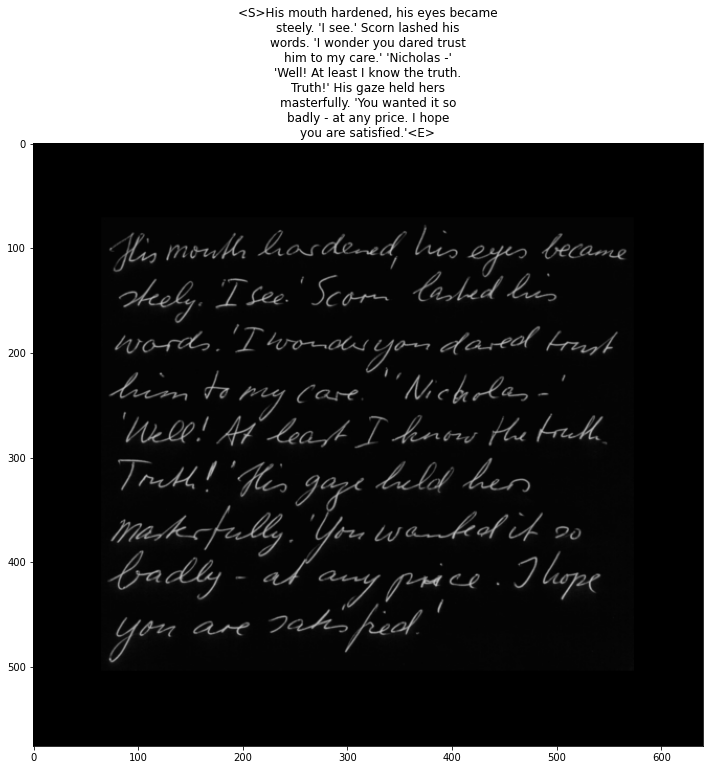

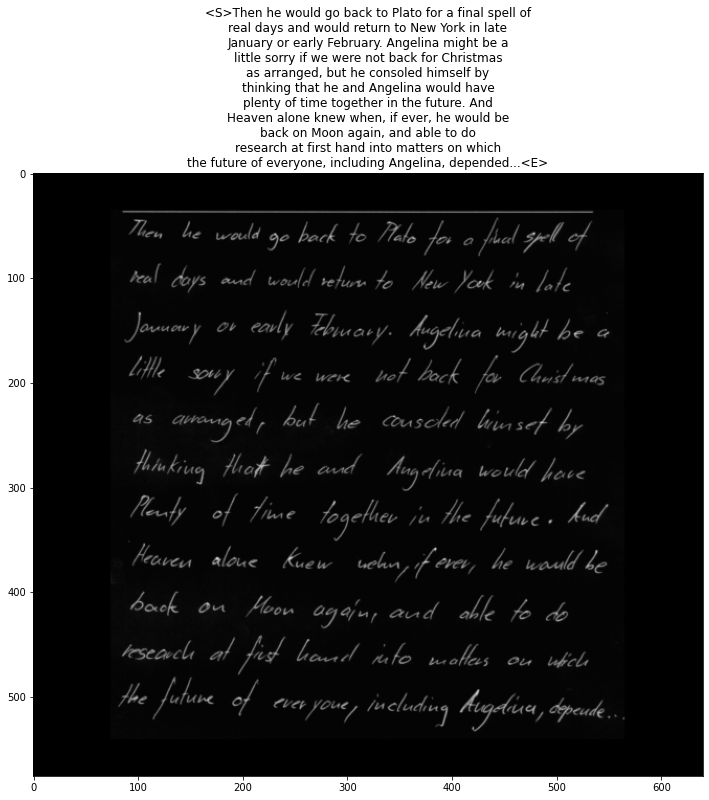

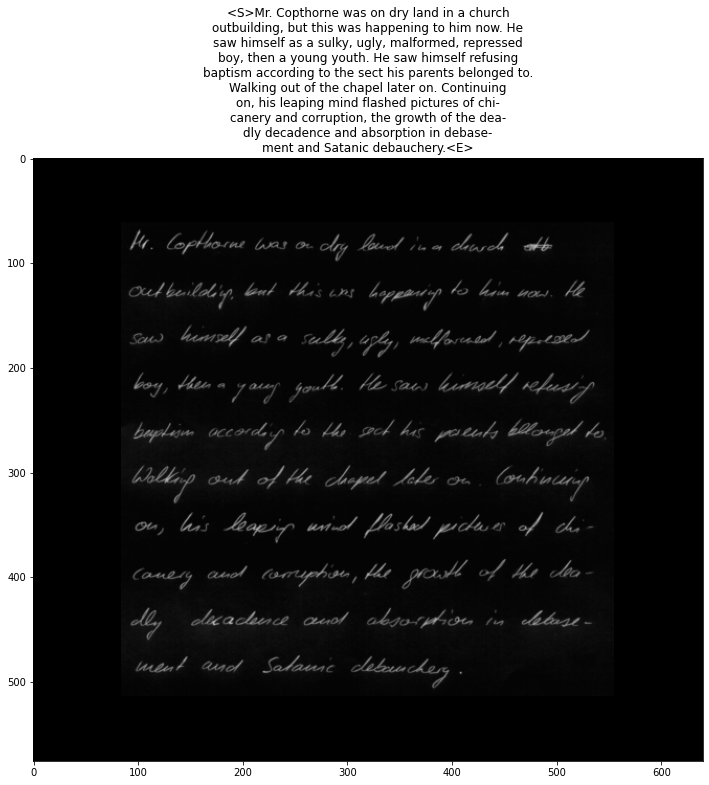

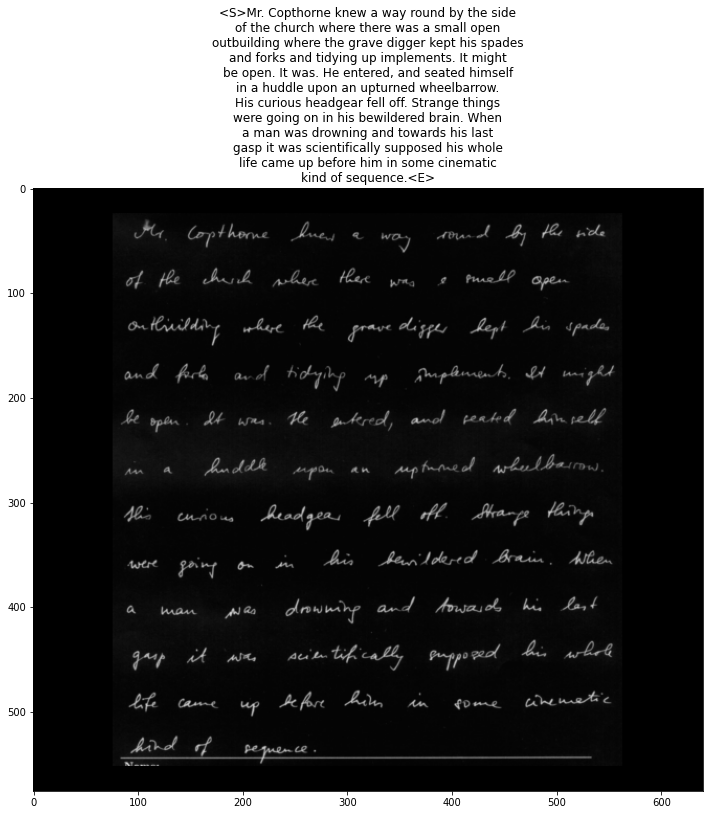

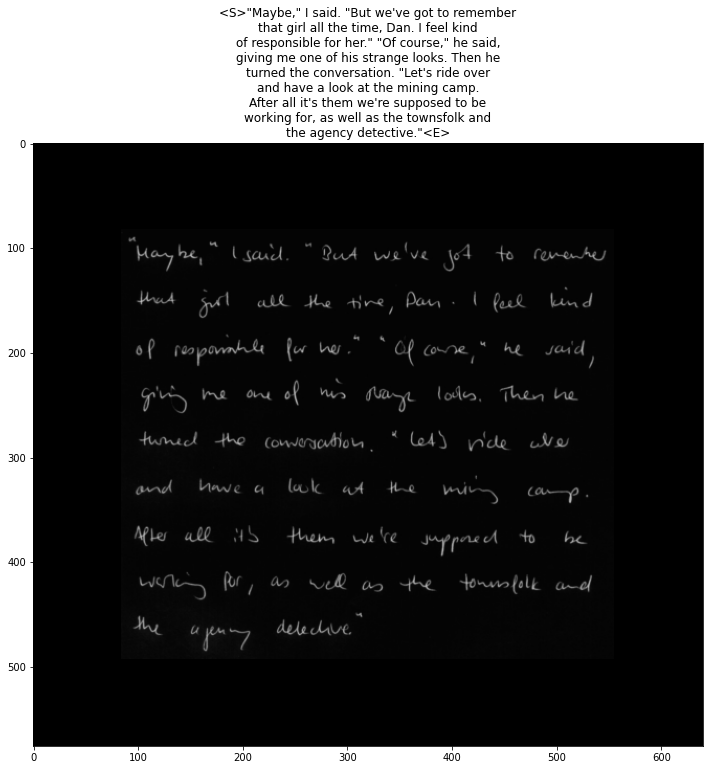

In [5]:
# Testing

for _ in range(5):
    i = random.randint(0, len(dataset.data_test))
    x, y = dataset.data_test[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [6]:
dataset = IAMSyntheticParagraphs()
dataset.prepare_data()
dataset.setup()
print(dataset)

IAMSyntheticParagraphs.prepare_data: preparing IAM lines for synthetic IAM paragraph creation...
Cropping IAM line regions and loading labels...
Saving images and labels at D:\Google Drive UCD\dev\fsdl-text-recognizer-2021-labs\data\processed\iam_synthetic_paragraphs...
IAMSyntheticParagraphs.setup(None): Loading trainval IAM paragraph regions and lines...
11395 samples with 1 lines
1495 samples with 2 lines
1535 samples with 3 lines
1558 samples with 4 lines
597 samples with 5 lines
606 samples with 6 lines
589 samples with 7 lines
565 samples with 8 lines
566 samples with 9 lines
IAM Synthetic Paragraphs Dataset
Num classes: 84
Input dims : (1, 576, 640)
Output dims: (682, 1)
Train/val/test sizes: 18906, 0, 0
Train Batch x stats: (torch.Size([128, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0111), tensor(0.0600), tensor(1.))
Train Batch y stats: (torch.Size([128, 682]), torch.int64, tensor(1), tensor(83))



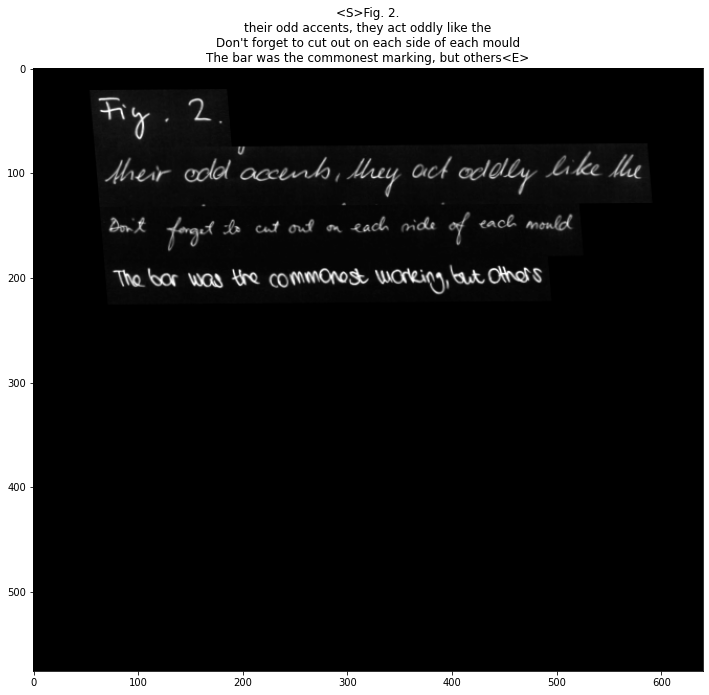

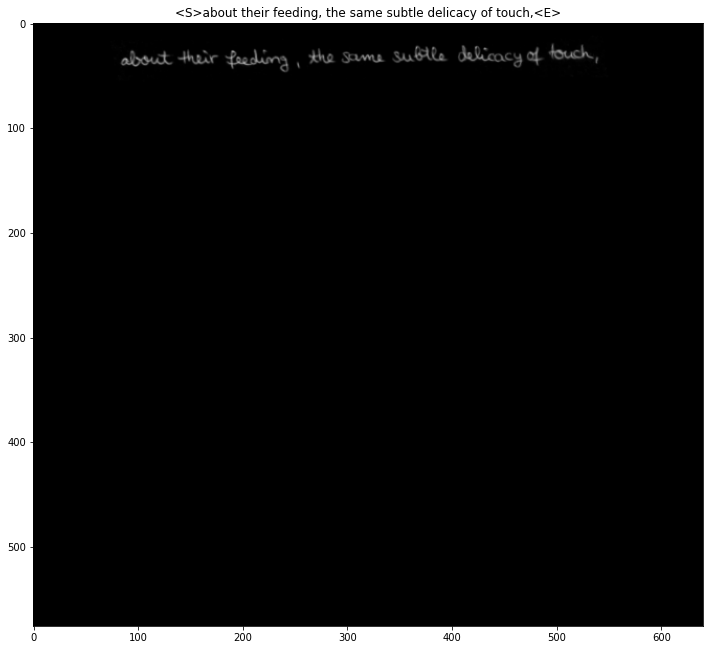

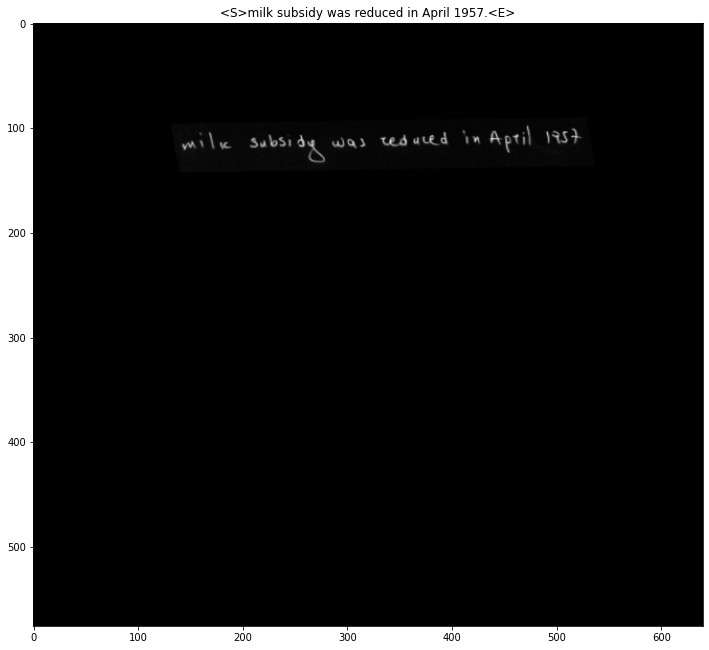

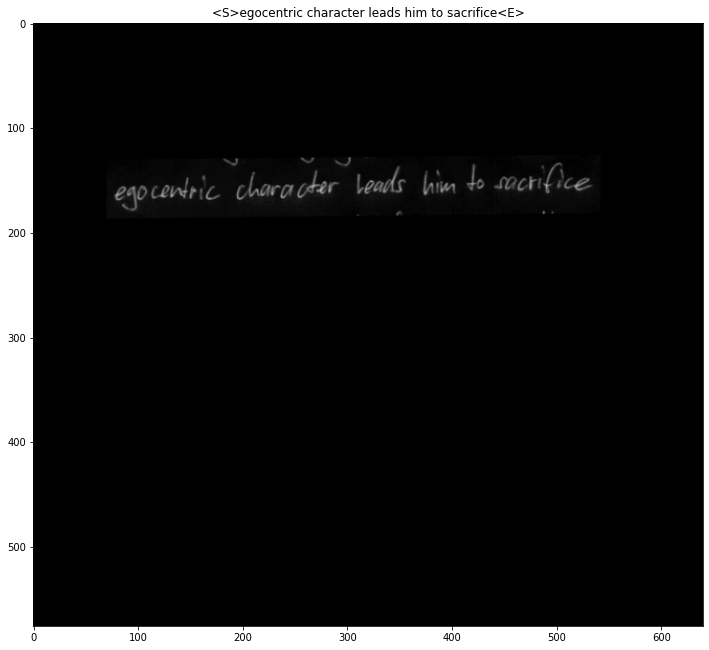

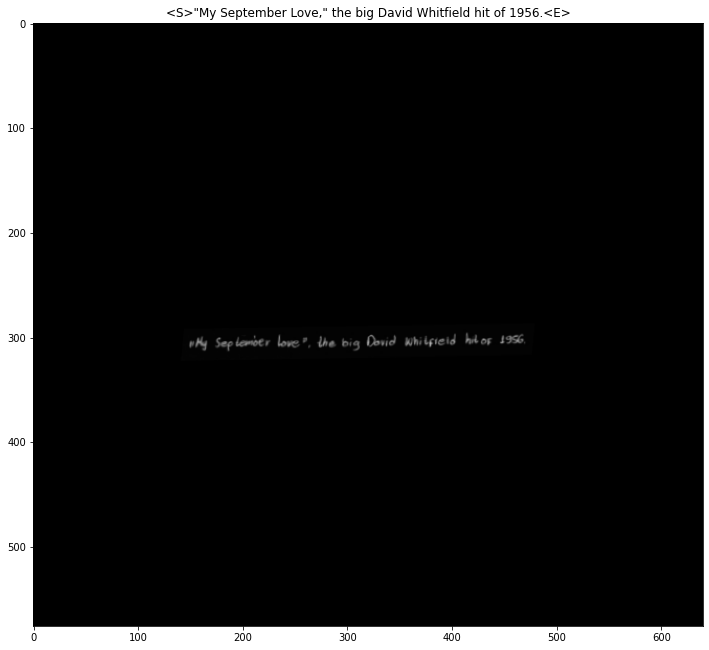

In [7]:
# Training

for _ in range(5):
    i = random.randint(0, len(dataset.data_train))
    x, y = dataset.data_train[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))